# 넷플릭스 주가 데이터 분석

---
### F01 / 데이터 전처리 ㅡ CSV 파일 읽기 및 필드 선택

- numpy, pandas, matplotlib 라이브러리 다운받기

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


- csv, numpy, pandas, matplotlib 가져오기

In [23]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Pandas 를 활용하여 CSV 파일을 불러온다
- df : data frame
- read_00 : csv, excel, json 등 넣을 수 있음

In [29]:
df = pd.read_csv('./NFLX.csv')
# df

1. 인덱스 안에, 열 이름을 문자열 리스트로 넣으면, 원하는 열만 볼 수 있다
2. loc() 메서드는 인덱스로 열 출력
   iloc() 메서드는 인덱스로 행 출력
- 변수만 적어도 출력이 된다

In [37]:
df = df[['Date', 'Open', 'High', 'Low', 'Close']]
# df.loc[[0, 1, 2, 3, 4]]
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


---
### F02 / 데이터 전처리 ㅡ 날짜 필터링

- 2021 년 이후 데이터만 필터링 된 데이터 프레임 만들기
- 주로 열에 종류를 넣고, 행에 항목을 나열하기 때문에, 열을 가져온다

In [38]:
df_2021 = df[(df['Date'] >= '2021-01-01')]

- 날짜 형식을 str 타입에서 datetime 으로 변경 (자동으로 2개월 단위로 보여진다)
- copy() : 경고를 방지하기 위해 사용
- to_datetime() : 문자열 형식을 날짜 형식으로 사용

In [52]:
df_2021 = df_2021.copy()
df_2021['Date'] = pd.to_datetime(df_2021['Date'])

- 종가(Close) 데이터를 그래프로 시각화
  

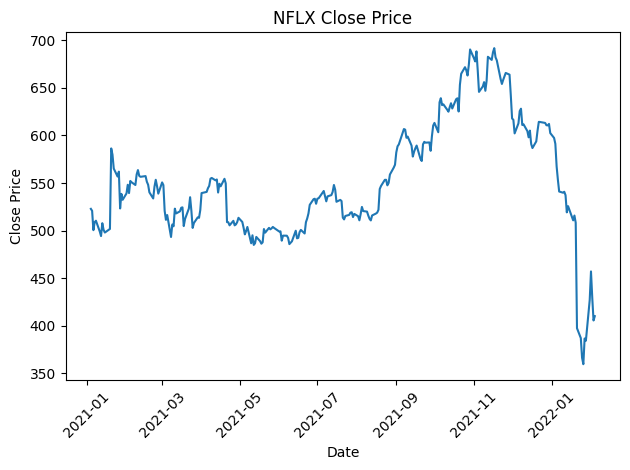

In [41]:
# 데이터 생성
x = df_2021['Date'] #x 좌표값
y = df_2021['Close'] #y 좌표값

# 그래프 그리기
plt.plot(x, y)

# 그래프에 제목과 축 레이블 추가
plt.title('NFLX Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

# x축 단위 기울이기
plt.xticks(rotation=45) # 45도 기울이기
plt.tight_layout() # 레이아웃 자동 조절

# 그래프 표시
plt.show()

---
### F03 / 데이터 분석 ㅡ 최고, 최저, 종가 추출

- min(), max() 를 사용해서 최솟값, 최댓값을 구한다
- 내장함수가 아닌 메서드로 사용한다

In [42]:
max_price = df_2021['Close'].max()
min_price = df_2021['Close'].min()

print("최고 종가:", max_price)
print("최저 종가:", min_price)

최고 종가: 691.690002
최저 종가: 359.700012


---
### F04 / 데이터 분석 ㅡ 최고, 최저, 종가 추출

- 위에서 만든 데이터 프레임을 활용하여, '월'만 작성한 열을 만든다

In [44]:
df_2021['Month'] = df_2021['Date'].dt.to_period('M')

- '월' 열을 중심으로 종가(Close) 평균 만들기
- groupby() : 그룹화하기
- mean() : 평균 구하기
- reset_index() : 인덱스 재설정하기

In [47]:
df_2021_month = df_2021.groupby('Month')['Close'].mean().reset_index() #새로운 열 중심으로 종가 평균 만들기
# df_2021_month

- '월'열이 float 형식이기 때문에 datetime 으로 변환해야하는데
- 바로 변환하면 오류가 생기기 때문에 str 로 변환한 다음에 datetime 으로 변환한다
- 이때 datetime 으로 변환하면서, 그래프의 날짜 단위가 2개월 단위로 자동으로 설정된다


In [48]:
df_2021_month['Month'] = df_2021_month['Month'].astype(str)
df_2021_month['Month'] = pd.to_datetime(month_avg['Month'])

- 그래프 그리기

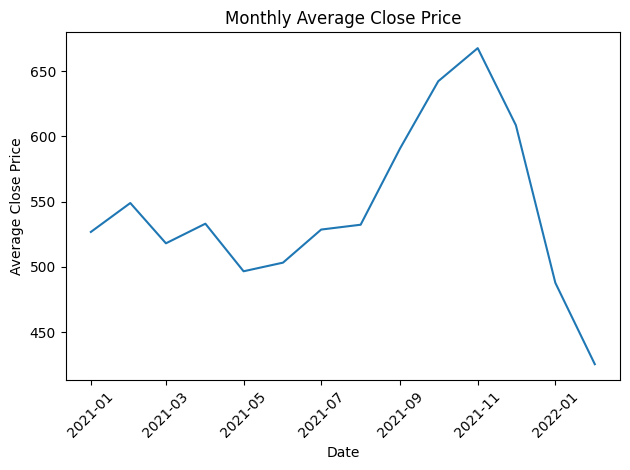

In [49]:
# 월별 평균 종가를 선 그래프로 그리기
plt.plot(df_2021_month['Month'], df_2021_month['Close'])

# 그래프 제목과 x축, y축 라벨 설정
plt.title('Monthly Average Close Price')  # 그래프 제목
plt.xlabel('Date')                       # x축 라벨
plt.ylabel('Average Close Price')        # y축 라벨

# x축 눈금 라벨을 45도 기울여 가독성 향상
plt.xticks(rotation=45)

# 그래프 레이아웃 자동 조절 (겹치지 않게)
plt.tight_layout()

# 그래프 출력
plt.show()

---
### F05 / 데이터 시각화 ㅡ 월별 최고, 최저, 종가 시각화

- 2022년 이후의 데이터만 필터링
- head() : 상위 5행만 보여줌
- tail() : 하위 5행만 보여줌

In [55]:
df_2022 = df[(df['Date'] >= '2022-01-01')]
df_2022.head()

,Date,Open,High,Low,Close
985,2022-01-03,605.609985,609.989990,590.559998,597.369995
986,2022-01-04,599.909973,600.409973,581.599976,591.150024
987,2022-01-05,592.000000,592.840027,566.880005,567.520020
988,2022-01-06,554.340027,563.359985,542.010010,553.289978
989,2022-01-07,549.460022,553.429993,538.219971,541.059998


- 날짜 형식을 str 에서 datetime 으로 바꾸기

In [57]:
df_2022 = df_2022.copy()
df_2022['Date'] = pd.to_datetime(df_2022['Date'])

- 그래프 그리기

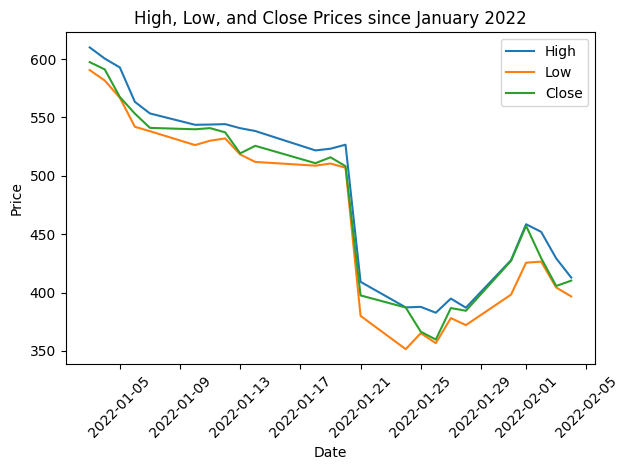

In [58]:
# 데이터 생성
x = f_df['Date'] #x 좌표값
y1 = f_df['High'] #y 좌표값 ㅡ 최고가
y2 = f_df['Low'] #y 좌표값 ㅡ 최저가
y3 = f_df['Close'] #y 좌표값 ㅡ 종가

# 그래프 그리기
plt.plot(x, y1, label='High')
plt.plot(x, y2, label='Low')
plt.plot(x, y3, label='Close')

# 범례 추가
plt.legend()

# 그래프에 제목과 축 레이블 추가
plt.title('High, Low, and Close Prices since January 2022')
plt.xlabel('Date')
plt.ylabel('Price')

# x축 단위 기울이기
plt.xticks(rotation=45) # 45도 기울이기
plt.tight_layout() # 레이아웃 자동 조절

# 그래프 표시
plt.show()